# Fake News Detection

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Load dataset

In [2]:
df = pd.read_csv("./dataset/news.csv",index_col=0)
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Exploratory Data Analysis

In [7]:
print("Number of fake news:", df[df["label"]=="FAKE"].shape[0])
print("Number of real news:", df[df["label"]=="REAL"].shape[0])
print("Total number of news:", df.shape[0])

Number of fake news: 3164
Number of real news: 3171
Total number of news: 6335


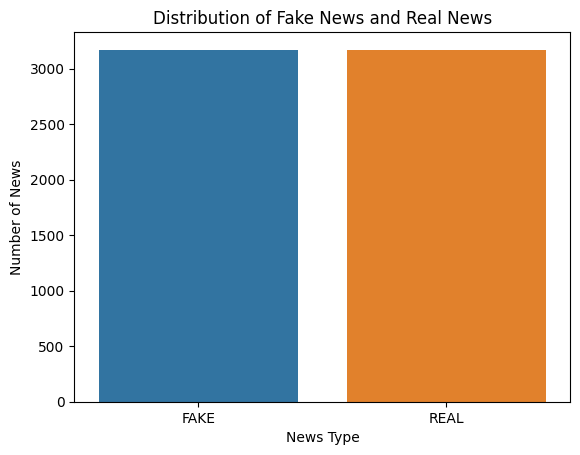

In [9]:
sns.countplot(x = df['label'])
plt.title('Distribution of Fake News and Real News')
plt.xlabel('News Type')
plt.ylabel('Number of News')
plt.show()

The dataset is balanced with the number of fake and real news sample being nearly equal.

In [18]:
# Checking for null values
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [19]:
# Checking for empty rows
print("title", df.title[df.title.str.strip()==''].count())
print("text", df.text[df.text.str.strip()==''].count())

title 0
text 36


Although there is no null value in any column, 36 rows in text column have empty text

In [23]:
# Check for duplicate rows
df.duplicated().sum()

29

There are 29 duplicate rows in the dataset

## Data Preprocessing

### Remove duplicate rows

In [27]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [28]:
df.duplicated().sum()

0

### Drop rows with empty text

In [31]:
df.drop(df.text[df.text.str.strip()==''].index,inplace=True)
df.reset_index(inplace=True,drop=True)

In [33]:
df.text[df.text.str.strip()==''].count()

0